In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

case_to_evaluate="9_3_1"

# Performance comparison of Imputation per case

## Distance based vs Neighbor based KNN Imputation Comparison

In [2]:
distance_based_r2_scores = pd.read_csv(f"data/{case_to_evaluate}/distance_based/combined_r2_scores.csv")
neighbor_based_r2_scores = pd.read_csv(f"data/{case_to_evaluate}/neighbor_based/combined_r2_scores.csv")
features_to_impute = pd.read_csv(f"data/{case_to_evaluate}/distance_based/features_to_impute.csv")

features_to_impute = features_to_impute["0"].to_list()
if "X_centroid" in features_to_impute:
    features_to_impute.remove("X_centroid")

if "Y_centroid" in features_to_impute:
    features_to_impute.remove("Y_centroid")

distance_based_r2_scores.rename(columns={"Radius": "Origin"}, inplace=True)

In [3]:
distance_based_r2_scores

,Feature,Score,Origin
0,pERK,0.0,10
1,Rad51,0.0,10
2,CCND1,0.0,10
3,Vimentin,0.0,10
4,aSMA,0.0,10
...,...,...,...
151,MajorAxisLength,0.0,100
152,MinorAxisLength,0.0,100
153,Solidity,0.0,100
154,Extent,0.0,100


In [4]:
neighbor_based_r2_scores

,Feature,Score,Origin
0,pERK,0.141219,no_spatial 2
1,Rad51,0.044714,no_spatial 2
2,CCND1,0.245797,no_spatial 2
3,Vimentin,0.343817,no_spatial 2
4,aSMA,-0.060724,no_spatial 2
...,...,...,...
255,MajorAxisLength,0.738931,spatial 6
256,MinorAxisLength,0.727838,spatial 6
257,Solidity,0.332758,spatial 6
258,Extent,0.319662,spatial 6


In [5]:
combined_r2_scores = pd.concat([distance_based_r2_scores,neighbor_based_r2_scores])
combined_r2_scores

,Feature,Score,Origin
0,pERK,0.000000,10
1,Rad51,0.000000,10
2,CCND1,0.000000,10
3,Vimentin,0.000000,10
4,aSMA,0.000000,10
...,...,...,...
255,MajorAxisLength,0.738931,spatial 6
256,MinorAxisLength,0.727838,spatial 6
257,Solidity,0.332758,spatial 6
258,Extent,0.319662,spatial 6


# Plot r2 scores

In [6]:
best_spatial_scores = combined_r2_scores[combined_r2_scores["Origin"] == "spatial 6"]
best_no_spatial_scores = combined_r2_scores[combined_r2_scores["Origin"] == "no_spatial 6"]
best_30_radius_scores = combined_r2_scores[combined_r2_scores["Origin"] == 30]
best_20_radius_scores = combined_r2_scores[combined_r2_scores["Origin"] == 20]

best_r2_scores = pd.concat([best_spatial_scores,best_no_spatial_scores,best_30_radius_scores, best_20_radius_scores])
best_r2_scores

,Feature,Score,Origin
234,pERK,0.337674,spatial 6
235,Rad51,0.338546,spatial 6
236,CCND1,0.333853,spatial 6
237,Vimentin,0.433736,spatial 6
238,aSMA,0.057644,spatial 6
...,...,...,...
47,MajorAxisLength,0.000000,20
48,MinorAxisLength,0.000000,20
49,Solidity,0.000000,20
50,Extent,0.000000,20


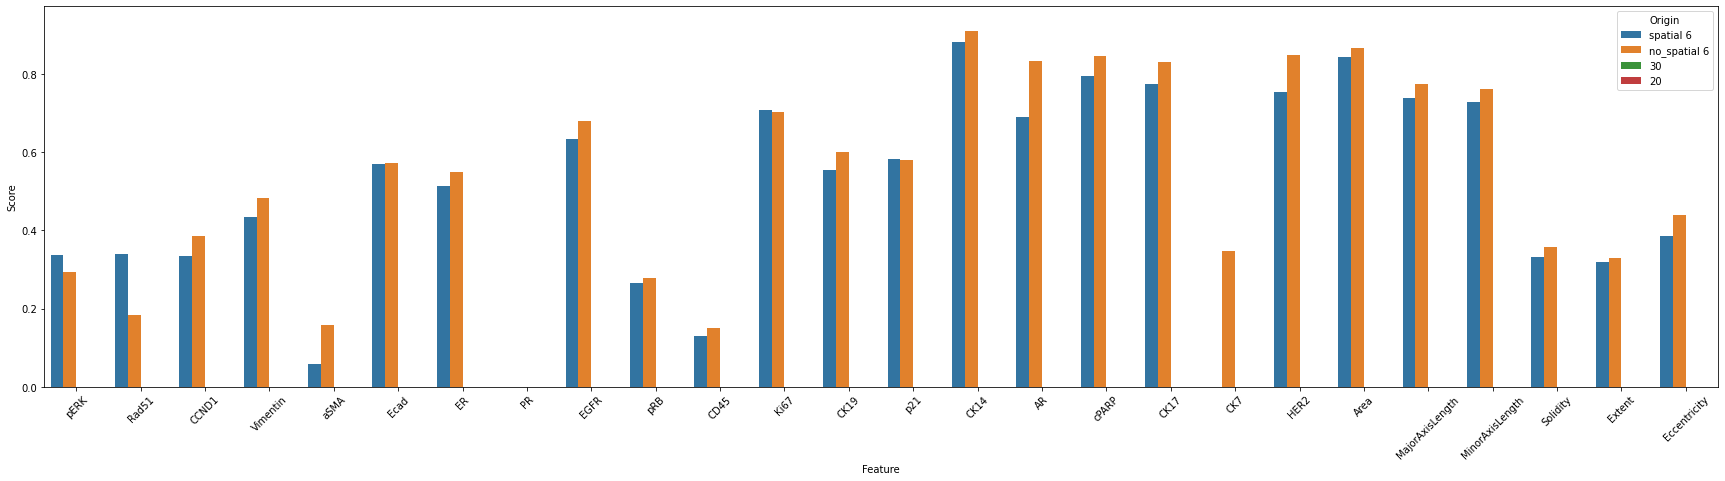

In [7]:
fig = plt.figure()
sns.barplot(x="Feature", y="Score",hue="Origin", data=best_r2_scores)
for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
plt.ylim(0)
fig.set_size_inches(30,7)
plt.show()

## Plot only improved marker

Select features which performed better in a feature engineered setting

In [8]:
features_of_interest = []

for feature in best_r2_scores["Feature"].unique():
    max_score = 0
    max_score_data = None
    for origin in best_r2_scores["Origin"].unique():
        feature_score = float(best_r2_scores.loc[(best_r2_scores["Origin"] == origin) & (best_r2_scores["Feature"] == feature)]["Score"].values)
        if max_score < feature_score:
            max_score = feature_score 
            max_score_data = best_r2_scores.loc[(best_r2_scores["Origin"] == origin) & (best_r2_scores["Feature"] == feature)]
                                            
    if max_score_data["Origin"].values[0] == 30 or max_score_data["Origin"].values[0] == 20:
        features_of_interest.append({"Feature": max_score_data["Feature"].values[0], "Score": max_score_data["Score"].values[0], "Origin": max_score_data["Origin"].values[0]})
        
features_of_interest = pd.DataFrame().from_records(features_of_interest)
features_of_interest

TypeError: 'NoneType' object is not subscriptable

In [ ]:
features_of_interest.to_csv(f"data/{case_to_evaluate}/distance_based/fe_improved_features.csv", index=False)

In [ ]:
print(f"{ len(features_of_interest) / len(features_to_impute) * 100 } % of the available features improved by using distance based KNN imputation.")

## Select only best performing features

In [ ]:
best_performing_features =best_r2_scores[pd.DataFrame(best_r2_scores["Feature"].tolist()).isin(features_of_interest["Feature"].tolist()).any(1).values]

In [ ]:
best_performing_features.to_csv(f"data/{case_to_evaluate}/distance_based/fe_best_performing_r2_scores.csv", index=False)

In [ ]:
fig = plt.figure()
sns.barplot(x="Feature", y="Score",hue="Origin", data=best_performing_features)
for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
fig.set_size_inches(15,7)
plt.ylim(0)
plt.show()

## Distance Based vs VAE performance

In [ ]:
vae_r2_scores = pd.read_csv(f"data/{case_to_evaluate}/vae_normal/combined_r2_scores.csv")
vae_r2_scores.rename(columns={"Radius": "Origin"}, inplace=True)
vae_r2_scores

### Show overview over r2 scores between VAE and FE KNN

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)
fig.set_size_inches(30,15)

sns.barplot(x="Feature", y="Score",hue="Origin", data=vae_r2_scores, ax=ax1)
sns.barplot(x="Feature", y="Score",hue="Origin", data=distance_based_r2_scores, ax=ax2)
sns.barplot(x="Feature", y="Score",hue="Origin", data=neighbor_based_r2_scores, ax=ax3)

ax1.set_title("VAE R2 scores")
ax2.set_title("Feature Engineered KNN")
ax3.set_title("Spatial & Non Spatial KNN")
plt.title("Generic overview of r2 scores")

for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
# set the spacing between subplots
fig.tight_layout()
plt.savefig(f"data/{case_to_evaluate}/vae_normal/knn_fe_knn_vae_score_overview.png",facecolor='w')

### Select best performing features

Selects only features which perform better compared to FE KNN imputation

In [ ]:
def find_best_performing_features_per_radius(radius: int, vae_r2_scores: pd.DataFrame, distance_based_r2_scores: pd.DataFrame):
    improved_features_by_vae = []
    for feature in vae_r2_scores["Feature"].unique():
    
        vae_score = float(vae_r2_scores.loc[(vae_r2_scores["Origin"] == radius) & (vae_r2_scores["Feature"] == feature)]["Score"].values)
        distance_score = float(distance_based_r2_scores.loc[(distance_based_r2_scores["Origin"] == radius) & (distance_based_r2_scores["Feature"] == feature)]["Score"].values)
        
        if vae_score > distance_score:
            max_score_data = vae_r2_scores.loc[(vae_r2_scores["Origin"] == radius) & (vae_r2_scores["Feature"] == feature)]
            improved_features_by_vae.append({"Feature": max_score_data["Feature"].values[0], "Score": max_score_data["Score"].values[0], "Origin": max_score_data["Origin"].values[0]})

    
    return pd.DataFrame().from_records(improved_features_by_vae)



In [ ]:
vae_improved_features = find_best_performing_features_per_radius(10, vae_r2_scores, distance_based_r2_scores)
# vae_improved_features.rename(columns={"Origin": "Radius"}, inplace=True)
vae_improved_features

### Combine vae with fe knn scores

In [ ]:

vae_r2_scores["Method"] = "VAE"
distance_based_r2_scores["Method"] = "FE KNN"
vae_x_fe_knn_scores= pd.concat([vae_r2_scores,distance_based_r2_scores])
vae_x_fe_knn_scores.reset_index(drop=True, inplace=True)
vae_x_fe_knn_scores

In [ ]:
# Create mean scores across all markers
mean_scores_per_origin_data = []
for origin in vae_x_fe_knn_scores["Origin"].unique():
    data = vae_x_fe_knn_scores[vae_x_fe_knn_scores["Origin"] == origin]
    mean_scores_per_origin_data.append(
        {
            "Score": data[data["Method"] == "VAE"]["Score"].mean(),
            "Method": "VAE",
            "Origin": origin
        }
    )
    
    mean_scores_per_origin_data.append(
        {
            "Score": data[data["Method"] == "FE KNN"]["Score"].mean(),
            "Method": "FE KNN",
            "Origin": origin
        }
    )
    
mean_scores_per_origin = pd.DataFrame().from_records(mean_scores_per_origin_data)
mean_scores_per_origin

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = sns.lineplot(data=vae_x_fe_knn_scores, x="Origin", y="Score", hue="Method")
#ax.fill_between(vae_x_fe_knn_scores.index, vae_x_fe_knn_scores.lower, vae_x_fe_knn_scores.upper, alpha=0.2)
plt.xlabel("Radius")

plt.title("Mean R2 score with increasing radius")
fig.tight_layout()
plt.savefig(f"data/{case_to_evaluate}/vae_normal/vae_knn_mean_performance_comparison.png",facecolor='w')

In [ ]:
fig, axs = plt.subplots(6, 5, figsize=(16, 30), dpi=300)

row = 0
col = 0

for feature in vae_x_fe_knn_scores["Feature"].unique():
    sns.lineplot(data=vae_x_fe_knn_scores[vae_x_fe_knn_scores["Feature"] == feature], x="Origin", y="Score", hue="Method", ax=axs[col, row])
    axs[col, row].set_title(feature)
    axs[col, row].get_legend().remove()
    axs[col, row].set_ylim(0, 1)
    
    row +=1
    
    if row == 5:
        row = 0
        col += 1

        
axs[0][0].legend()

plt.xlabel("Radius")
plt.title("R2 Score per feature")
fig.tight_layout()
plt.savefig(f"data/{case_to_evaluate}/vae_normal/feature_performance.png",facecolor='w')

